In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score, mean_absolute_error, \
mean_absolute_percentage_error, mean_squared_error


In [2]:
sns.set(rc={'figure.figsize': [15, 11]}, font_scale=1.2)


In [3]:
#read dataframe
df=pd.read_csv("./datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#check missing values
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
#Check duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [6]:
#Check column types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<ipython-input-7-302ed3d0b47a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

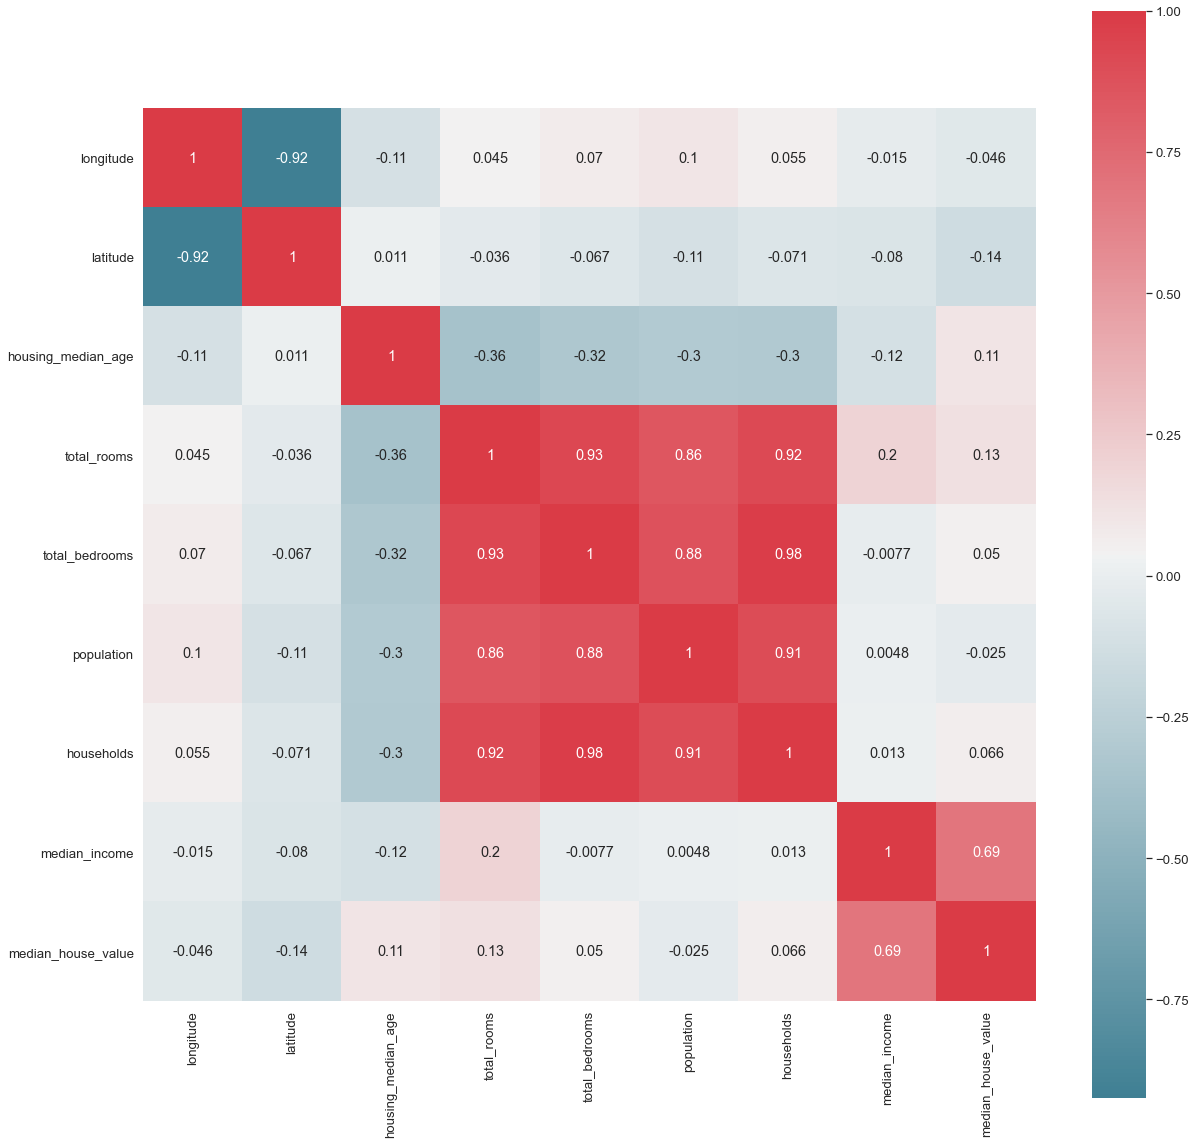

In [7]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [8]:
#count how many null values in each column
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

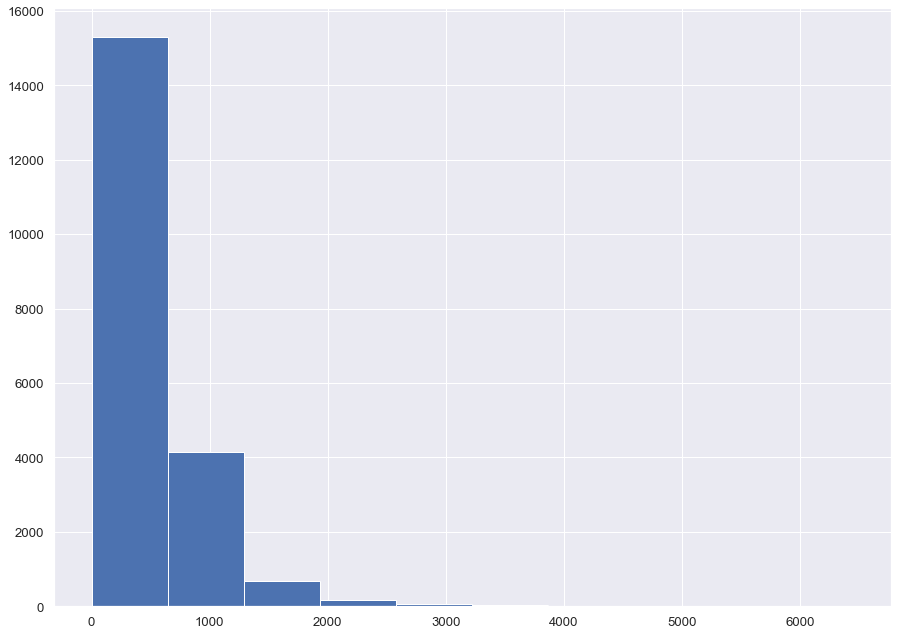

In [9]:
df.total_bedrooms.hist();

In [10]:
#Fill with median not mean since it is right skewed
df.total_bedrooms.fillna(df.total_bedrooms.median(), inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
#check missing values. We are done!
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


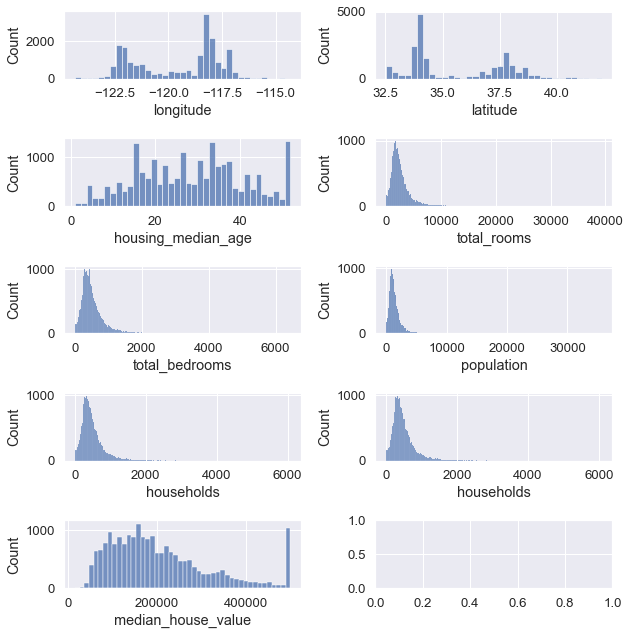

In [13]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.histplot(df['longitude'], ax = ax[0,0]) 
sns.histplot(df['latitude'], ax = ax[0,1]) 
sns.histplot(df['housing_median_age'], ax = ax[1,0]) 
sns.histplot(df['total_rooms'], ax = ax[1,1]) 
sns.histplot(df['total_bedrooms'], ax = ax[2,0]) 
sns.histplot(df['population'], ax = ax[2,1]) 
sns.histplot(df['households'], ax = ax[3,0]) 
sns.histplot(df['households'], ax = ax[3,1]) 
sns.histplot(df['median_house_value'], ax = ax[4,0]) 
plt.tight_layout()
plt.show()

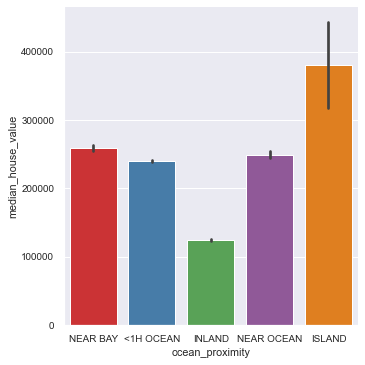

In [14]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=0.9)
sns.catplot(x = 'ocean_proximity', y='median_house_value', kind = 'bar', data=df, palette="Set1")

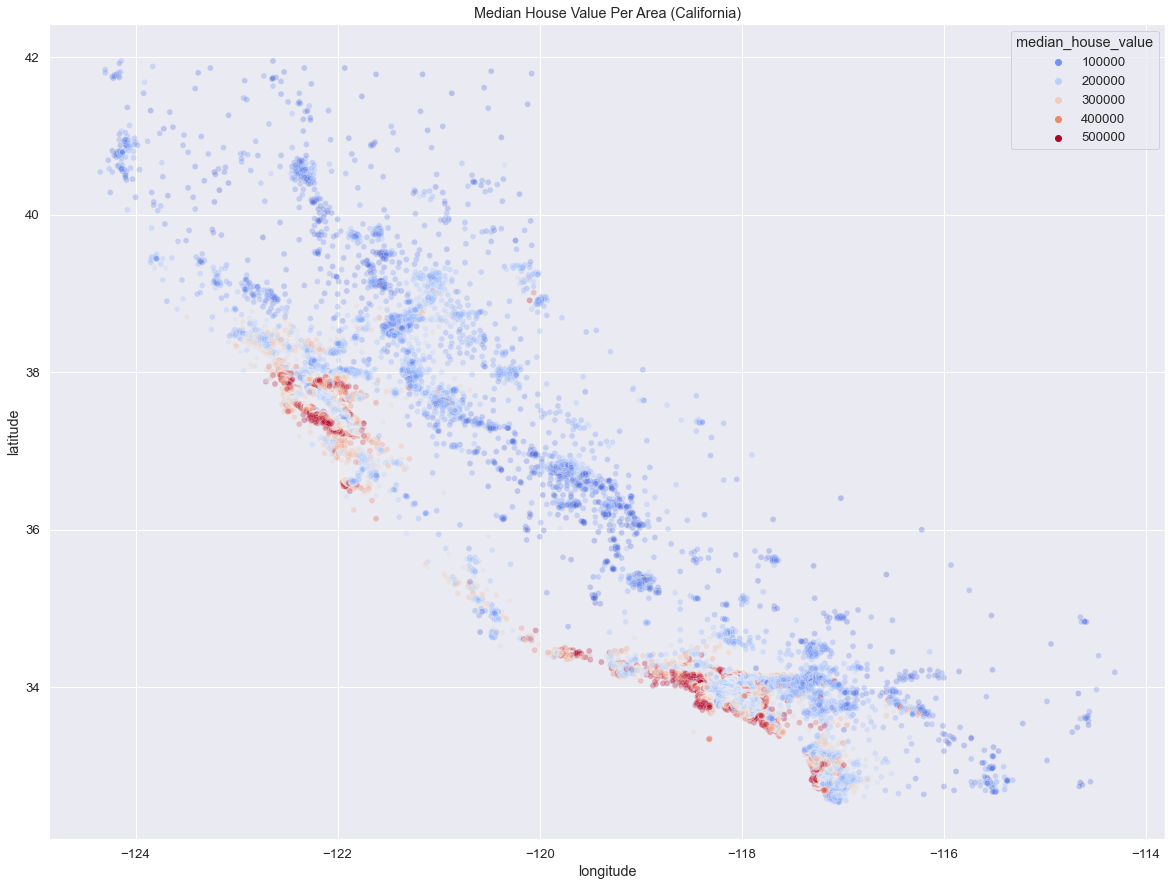

In [15]:
#The location of the household is an important factor in its price, we can see that areas closer to the bay have a higher median price.
sns.set(rc={'figure.figsize': [20, 15]}, font_scale=1.2)
ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.3);
ax.set_title("Median House Value Per Area (California)");

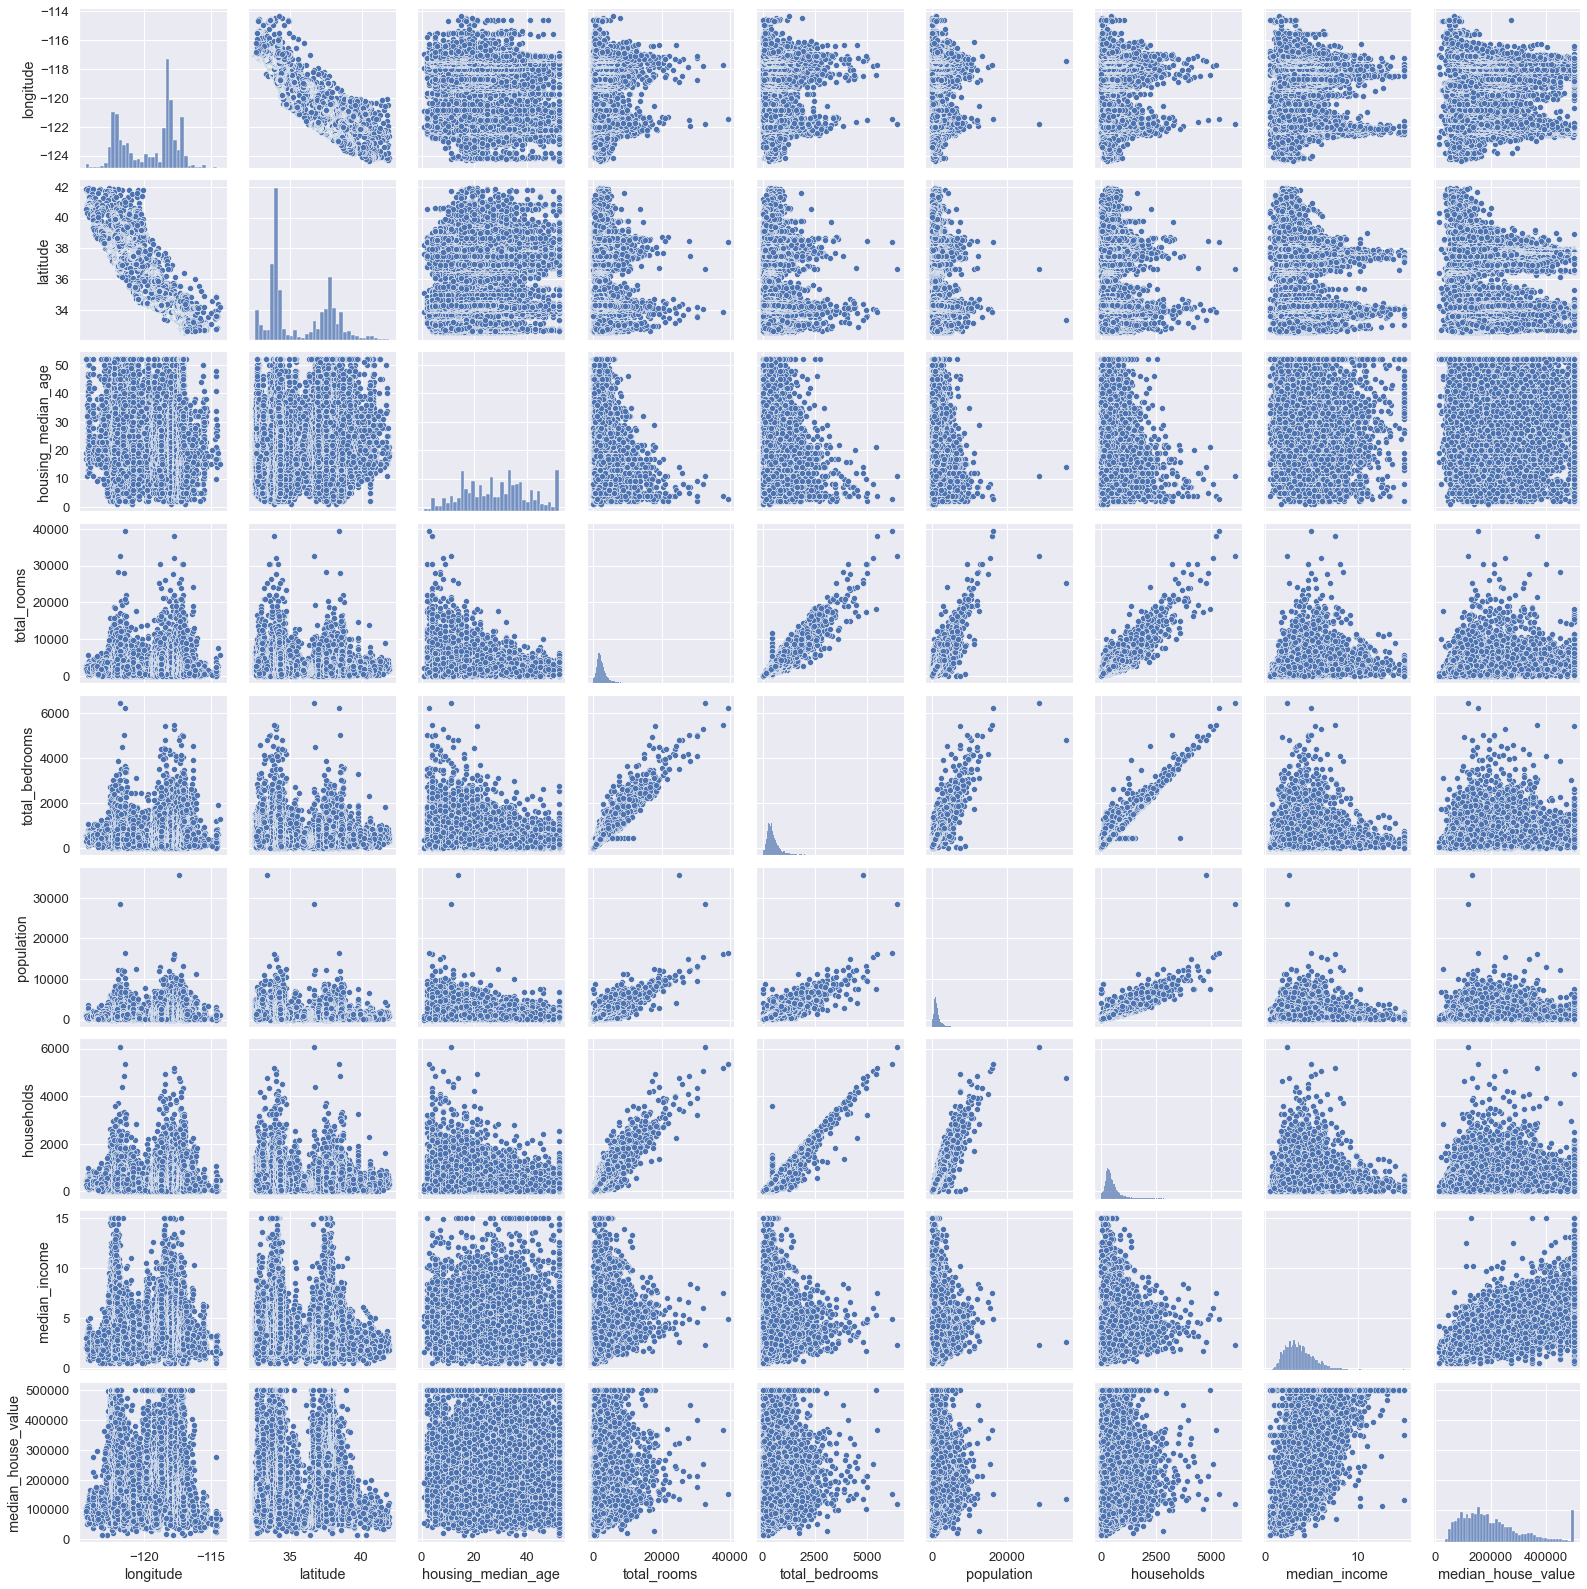

In [16]:
sns.pairplot(data=df)

In [17]:
#filter out those rows with does not contain any data
df=df.dropna(how='all')

In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='median_house_value'>

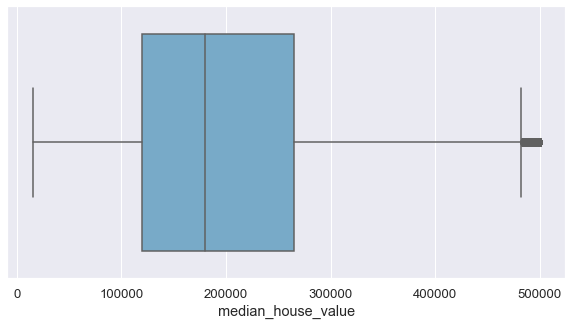

In [19]:
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.2)
sns.boxplot(data=df,x="median_house_value", palette="Blues")

<AxesSubplot:xlabel='longitude'>

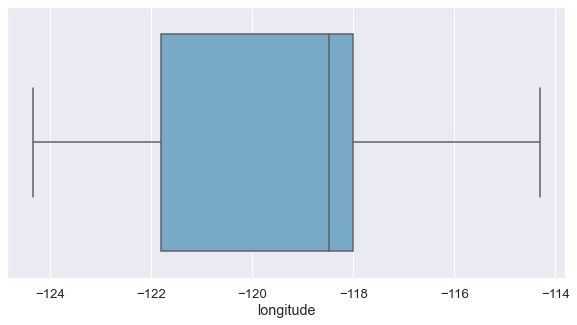

In [20]:
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.2)
sns.boxplot(data=df,x="longitude", palette="Blues")

In [21]:
import datasist as ds
from datasist.structdata import detect_outliers

In [22]:
outlier= detect_outliers(df,0,[ 'total_rooms', 'total_bedrooms',"population","households","median_income","median_house_value"])
len(outlier)
df.drop(outlier,inplace=True)

In [23]:
le = LabelEncoder()
df.ocean_proximity = le.fit_transform(df.ocean_proximity)

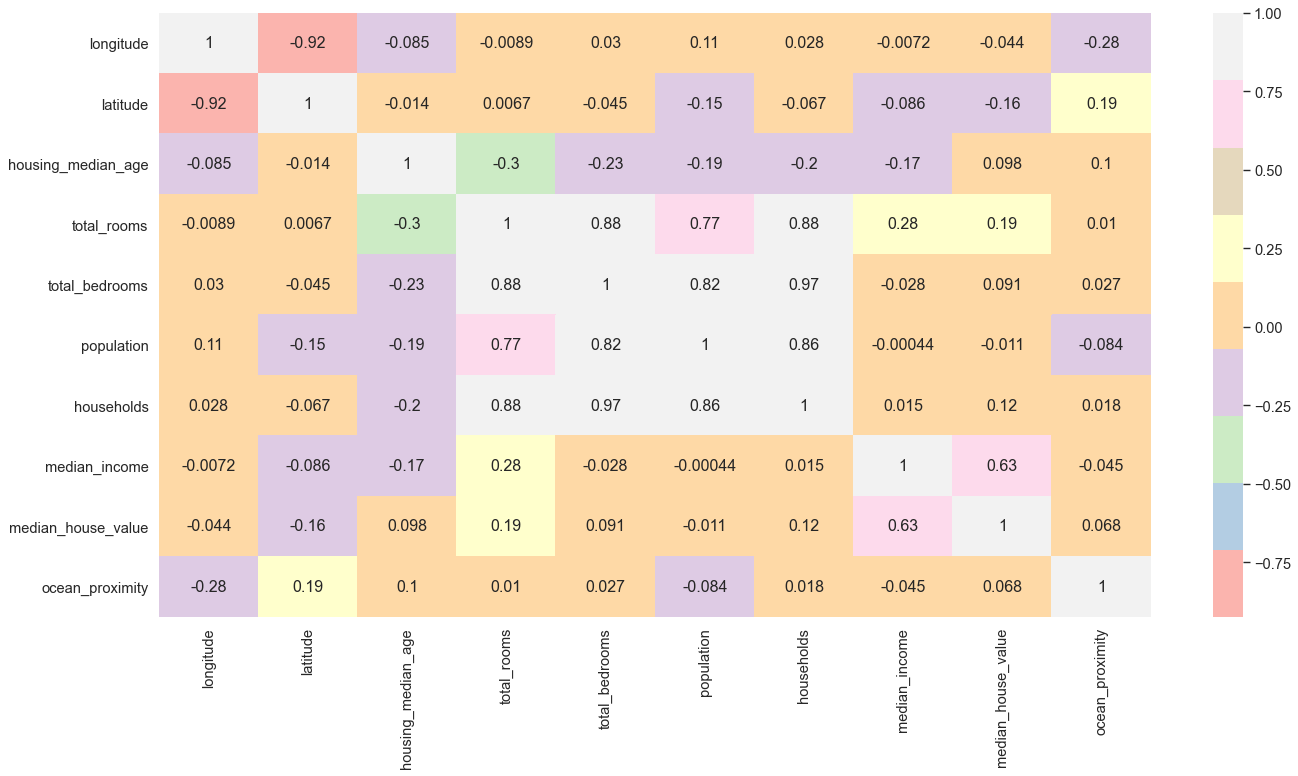

In [24]:
plt.figure(figsize=(20, 10), dpi=80)
sns.heatmap(df.corr(), cmap="Pastel1", annot=True);

In [25]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=123, shuffle=True)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

y_train = np.array(y_train) / 30e3
y_test = np.array(y_test) / 30e3
#scaler2.fit(y_train.reshape(-1, 1))
#y_train=scaler2.fit_transform(y_train.reshape(-1, 1)) * 10
#y_test=scaler2.transform(y_test.reshape(-1, 1)) * 10

In [37]:
y_train

array([13.61666667,  1.77333333,  8.31666667, ..., 10.49666667,
       11.53      ,  5.04666667])

In [38]:
np.save('X_test.npy', X_test)
np.save('X_train.npy', X_train)
np.save('y_test.npy', y_test)
np.save('y_train.npy', y_train)

In [39]:
def random_split(X, y, n, seed):
    """Equally split data between n agents"""
    rng = np.random.default_rng(seed)
    perm = rng.permutation(y.size)
    X_split = np.array_split(X[perm], n)  #np.stack to keep as a np array
    y_split = np.array_split(y[perm], n)
    return X_split, y_split

In [40]:
X, y = random_split(X_train, y_train, 20, 1234)


In [41]:
y_train

array([13.61666667,  1.77333333,  8.31666667, ..., 10.49666667,
       11.53      ,  5.04666667])

In [ ]:
y[0]

In [ ]:
X[0][:, 0:4] *= -1.0

In [ ]:
X[0][:, 0:4]